# Análise de Distúrbios do Sono

O sono é um dos pilares fundamentais da saúde física e mental. Distúrbios do sono estão associados a diversos problemas, como queda de produtividade, aumento do estresse, doenças cardiovasculares e redução da qualidade de vida.

Este projeto tem como objetivo analisar dados de saúde e estilo de vida para identificar **quais perfis de pessoas tendem a apresentar distúrbios do sono**.  
A base utilizada contém informações como:

- Idade  
- Gênero  
- Profissão  
- Duração e qualidade do sono  
- Nível de estresse  
- Nível de atividade física  
- Índice de massa corporal (IMC)  
- Pressão arterial  
- Frequência cardíaca  
- Passos diários  

A partir desses dados, buscamos responder perguntas como:

- Pessoas mais estressadas dormem pior?  
- O excesso de peso está associado a distúrbios do sono?  
- Algumas profissões apresentam maior incidência?  
- Há relação entre pressão arterial elevada e problemas de sono?

O foco do projeto é transformar dados brutos em **insights práticos**, identificando padrões que indiquem maior risco de distúrbios do sono.


In [1]:
# Importando as bibliotecas e a base de dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import transforms



df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Definindo Paleta de Cores

In [ ]:
# Definindo a paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

# Criando Funções Auxiliar

In [ ]:
# Criando uma função para aplicar os comentários no gráfico

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

## Hipóteses Iniciais

Antes de iniciar a exploração dos dados, partimos de algumas hipóteses:

1. Pessoas com níveis mais altos de estresse tendem a apresentar maior incidência de distúrbios do sono.
2. Indivíduos com IMC elevado (sobrepeso ou obesidade) apresentam maior risco.
3. Profissões com alta carga física ou emocional podem concentrar mais casos.
4. Pressão arterial elevada pode estar associada a problemas de sono.
5. Menor nível de atividade física e menos passos diários podem impactar negativamente a qualidade do sono.

As análises a seguir buscam validar ou refutar essas hipóteses com base nos dados.

## Análise Exploratória

Nesta etapa, realizaremos uma Análise Exploratória dos Dados (EDA – *Exploratory Data Analysis*), com o objetivo de compreender a estrutura do dataset, identificar padrões, comportamentos relevantes e possíveis anomalias.

Essa fase é fundamental para:

- Entender a distribuição das variáveis  
- Verificar a presença de valores inconsistentes ou atípicos  
- Explorar relações iniciais entre as variáveis  
- Avaliar se os dados estão coerentes com o contexto do problema  

A partir dessa exploração, será possível direcionar melhor as análises seguintes, validar hipóteses iniciais e garantir que os insights extraídos sejam confiáveis e alinhados com o objetivo do projeto.


In [3]:
# Observando os dados da nossa base.

df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
# Coletando informações sobre tipos de cada coluna e se há valores vazios.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# Calculando quantas linhas vazias tem nossa base

df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
# Observando dados estatísticos de nossas bases para analisar se há alguma irregularidade.

df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
# Verificando quantas linhas tempos em branco na coluna 'Sleep Disorder'.

df['Sleep Disorder'].isnull().value_counts()

Sleep Disorder
True     219
False    155
Name: count, dtype: int64

In [8]:
df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Gender'].value_counts()


Gender
Female    103
Male       52
Name: count, dtype: int64

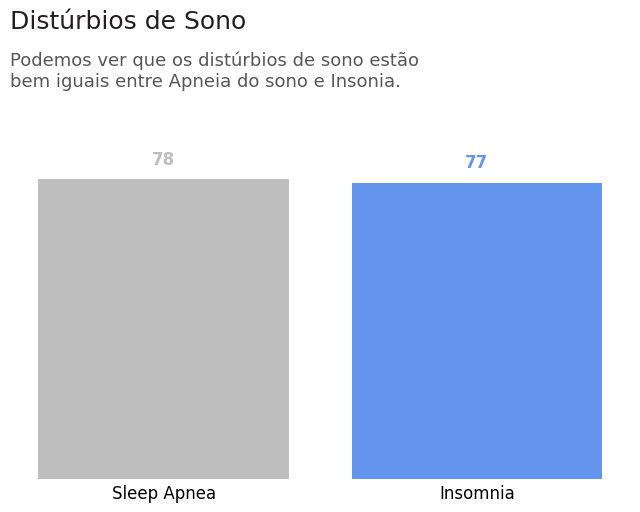

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# Criando o gráfico

filtro = df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])
v = df.loc[filtro, 'Sleep Disorder'].value_counts()

cores = [CINZA5, AZUL3]

ax.bar(v.index, 
       v.values, 
       color= cores 
       )

# Colocando o rótulo de dados em cada barra

for i, (x, y) in enumerate(zip(v.index, v.values)):
    ax.annotate(
        y,
        (x, y),
        ha='center',
        va='bottom',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold',
        color=cores[i % len(cores)]
    )

# Definindo o Título

plt.suptitle('Distúrbios de Sono', fontsize= 18, ha = 'right', color=CINZA1, y = 1.05, x= 0.42)

# Definindo o Sub título

plt.title('Podemos ver que os distúrbios de sono estão\nbem iguais entre Apneia do sono e Insonia.', fontsize= 13, loc = "left", color=CINZA3)

ax.tick_params(axis='both', which='both', length=0, labelsize=12)
ax.set_ylim((0,100))

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Insight do Gráfico

O gráfico revela que os dois principais tipos de distúrbios do sono presentes na base — **Apneia do Sono** e **Insônia** — possuem incidências praticamente equivalentes.  
A diferença entre eles é mínima, indicando uma distribuição bastante equilibrada entre essas condições.

Esse comportamento sugere que os problemas de sono não estão concentrados em um único tipo específico, mas sim distribuídos entre diferentes manifestações.  
Dessa forma, estratégias de prevenção e cuidado devem considerar tanto fatores associados à insônia (como estresse e rotina) quanto aspectos relacionados à apneia (como peso, saúde respiratória e cardiovascular).


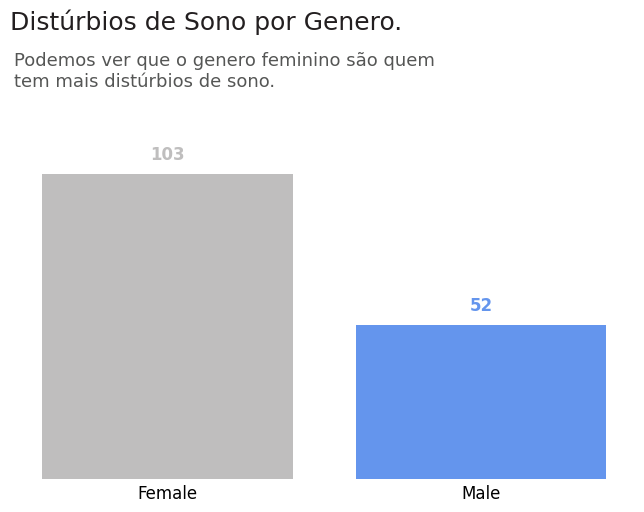

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# Criando o gráfico

filtro = df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])
v = df.loc[filtro, 'Gender'].value_counts()

cores = [CINZA5, AZUL3]

ax.bar(v.index, 
       v.values, 
       color= cores 
       )

# Colocando o rótulo de dados em cada barra

for i, (x, y) in enumerate(zip(v.index, v.values)):
    ax.annotate(
        y,
        (x, y),
        ha='center',
        va='bottom',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold',
        color=cores[i % len(cores)]
    )

# Definindo o Título

plt.suptitle('Distúrbios de Sono por Genero.', fontsize= 18, ha = 'right', color=CINZA1, y = 1.05, x= 0.61)

# Definindo o Sub título

plt.title('Podemos ver que o genero feminino são quem \ntem mais distúrbios de sono.', fontsize= 13, loc = "left", color=CINZA3)

ax.tick_params(axis='both', which='both', length=0, labelsize=12)
ax.set_ylim((0,130))

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Insight do Gráfico

- A análise revela que o público feminino apresenta uma proporção maior de casos de distúrbios do sono em comparação ao masculino.  
- Esse comportamento pode estar relacionado a fatores biológicos, hormonais e sociais, além de uma maior exposição a cargas emocionais e múltiplas jornadas (profissional e doméstica), que podem impactar diretamente a qualidade do sono.


In [12]:
df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Occupation'].value_counts()

Occupation
Nurse                   64
Teacher                 31
Salesperson             30
Doctor                   7
Accountant               7
Engineer                 6
Lawyer                   5
Sales Representative     2
Scientist                2
Software Engineer        1
Name: count, dtype: int64

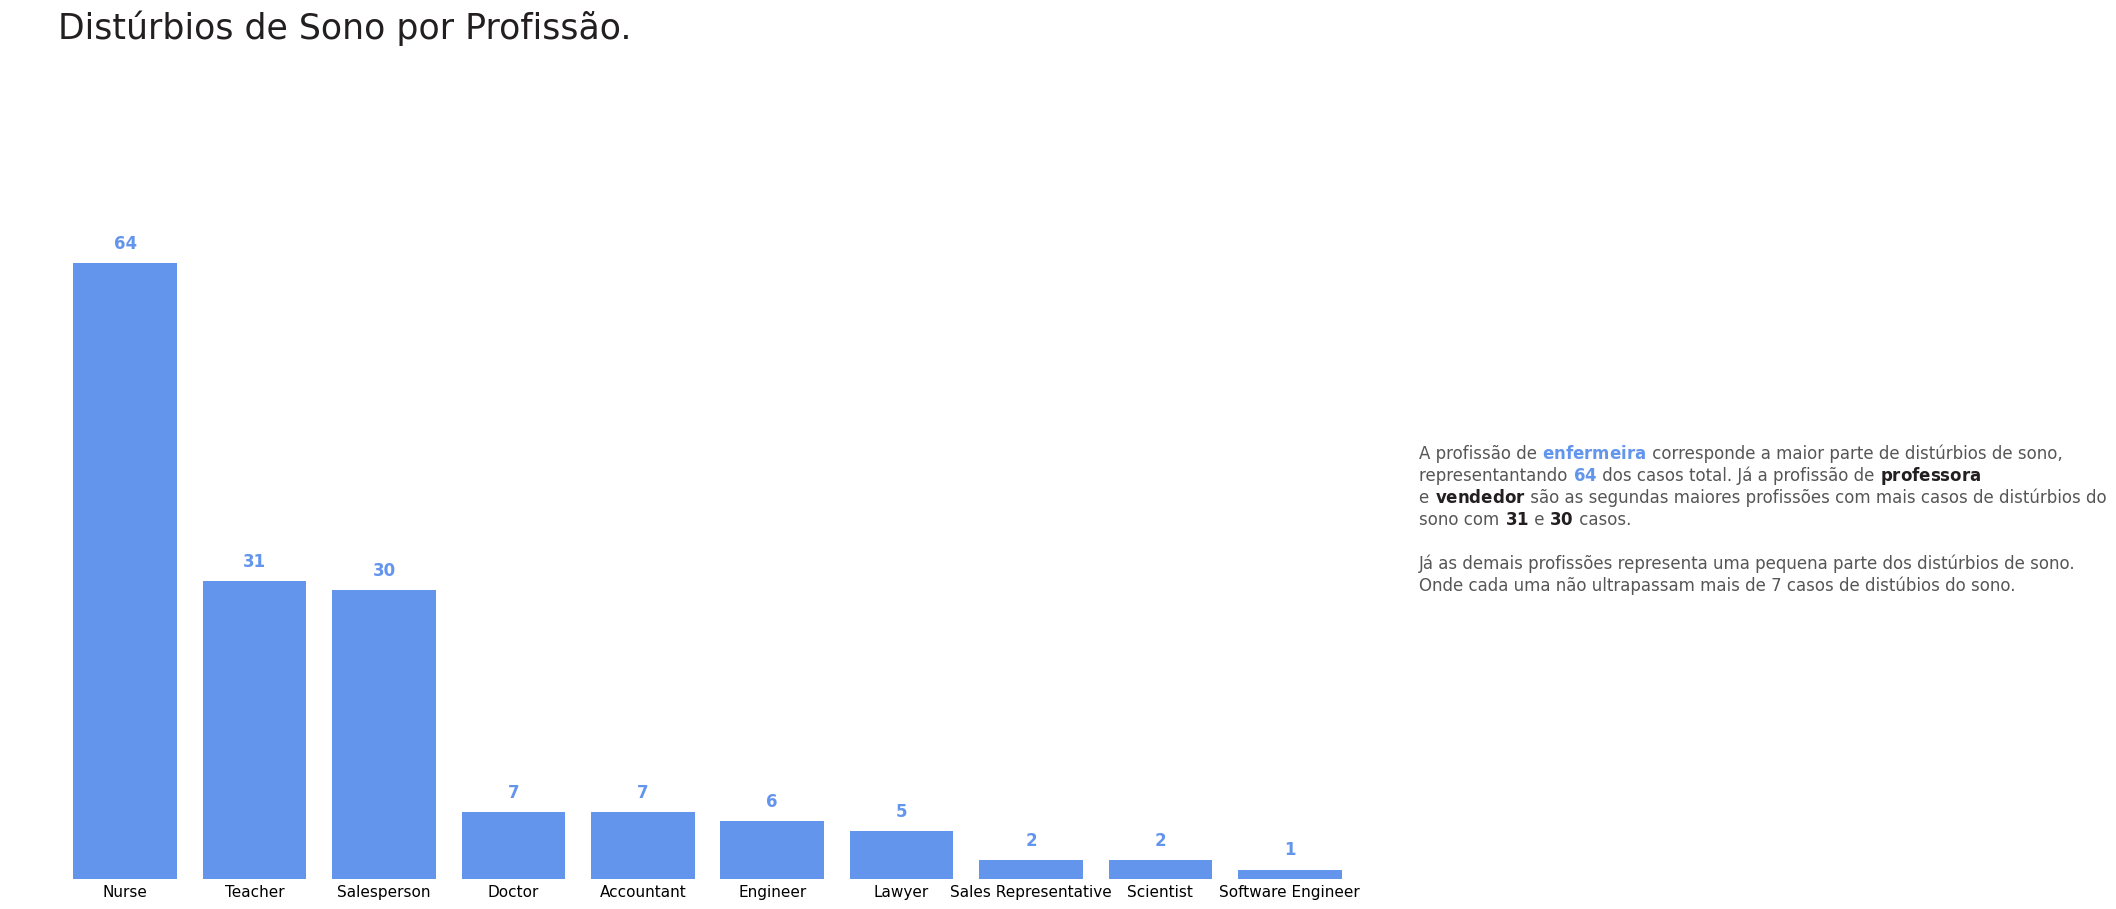

In [14]:
fig, ax = plt.subplots(figsize=(18,10))

filtro = df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])
v = df.loc[filtro, 'Occupation'].value_counts()

cores = [CINZA5, AZUL3]

ax.bar(v.index, 
       v.values,
       color = AZUL3
       )

for i, (x, y) in enumerate(zip(v.index, v.values)):
    ax.annotate(
        y,
        (x, y),
        ha='center',
        va='bottom',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold',
        color= AZUL3,
    )

plt.suptitle('Distúrbios de Sono por Profissão.', fontsize= 25, ha = 'right', color=CINZA1, x= 0.47)
#plt.title('Total de disturbios de sono por profissão', fontsize= 18, loc='left', color= CINZA3, x= 0.03, y= 1)



ax.tick_params(axis='both', which='both', length=0, labelsize=11)
#plt.xticks(rotation=45)
ax.set_ylim((0,80))
#ax.axvline(x=10, color= CINZA5)


# Anotando uma conclusão no gráfico
texto_colorido(
    10, 30,                                                             # coordenadas
    'A profissão de ||$\\bf{enfermeira}$|| corresponde a maior parte de distúrbios de sono,\n'        # texto
    'representantando ||$\\bf{64}$|| dos casos total. Já a profissão de ||$\\bf{professora}$||\n'
    'e ||$\\bf{vendedor}$|| são as segundas maiores profissões com mais casos de distúrbios do\n'
    'sono com ||$\\bf{31}$|| e ||$\\bf{30}$|| casos.\n'
    '\n'
    'Já as demais profissões representa uma pequena parte dos distúrbios de sono.\n'
    'Onde cada uma não ultrapassam mais de 7 casos de distúbios do sono.',
    [[CINZA3, AZUL3, CINZA3],         # linha 1                          # cores
     [CINZA3, AZUL3, CINZA3, CINZA1],        # linha 2
     [CINZA3,CINZA1,CINZA3, CINZA1, CINZA3], # linha 3
     [CINZA3, CINZA1, CINZA3, CINZA1, CINZA3],                         # linha 4
     [CINZA3],                        # linha 5
     [CINZA3],                # linha 6
     [CINZA3],                # linha 7
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)



ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Insight do Gráfico

- Observa-se que determinadas profissões concentram uma proporção significativamente maior de casos de distúrbios do sono, com destaque para representantes comerciais, profissionais de vendas, enfermeiros e professores.  
- Essas ocupações, em geral, estão associadas a altos níveis de estresse, grande carga emocional e, em muitos casos, jornadas irregulares, fatores que impactam diretamente a qualidade do sono.  
- Entre elas, a profissão de enfermeiro merece atenção especial, pois apresenta o maior índice, possivelmente em função de turnos noturnos, rotinas intensas e elevada pressão psicológica inerente à atividade.


In [ ]:
# Verificando a quantidade total dos distúrbios de sono com um filtro aplicado

df[df['Sleep Duration'] <= 8.0]['Sleep Disorder'].value_counts().sum()

np.int64(132)

In [ ]:
# Verificando os dados com um filtro aplicado

df[(df['Quality of Sleep'] <= 7) & (df['Sleep Duration'] <= 7.0) & (df['Sleep Disorder'] == 'Sleep Apnea') | (df['Sleep Disorder'] == 'Insomnia')]\
    [['Sleep Duration', 'Quality of Sleep', 'Sleep Disorder']]

,Sleep Duration,Quality of Sleep,Sleep Disorder
3,5.9,4,Sleep Apnea
4,5.9,4,Sleep Apnea
5,5.9,4,Insomnia
6,6.3,6,Insomnia
16,6.5,5,Sleep Apnea
...,...,...,...
308,6.6,7,Insomnia
309,6.6,7,Insomnia
310,6.6,7,Insomnia
311,6.6,7,Insomnia


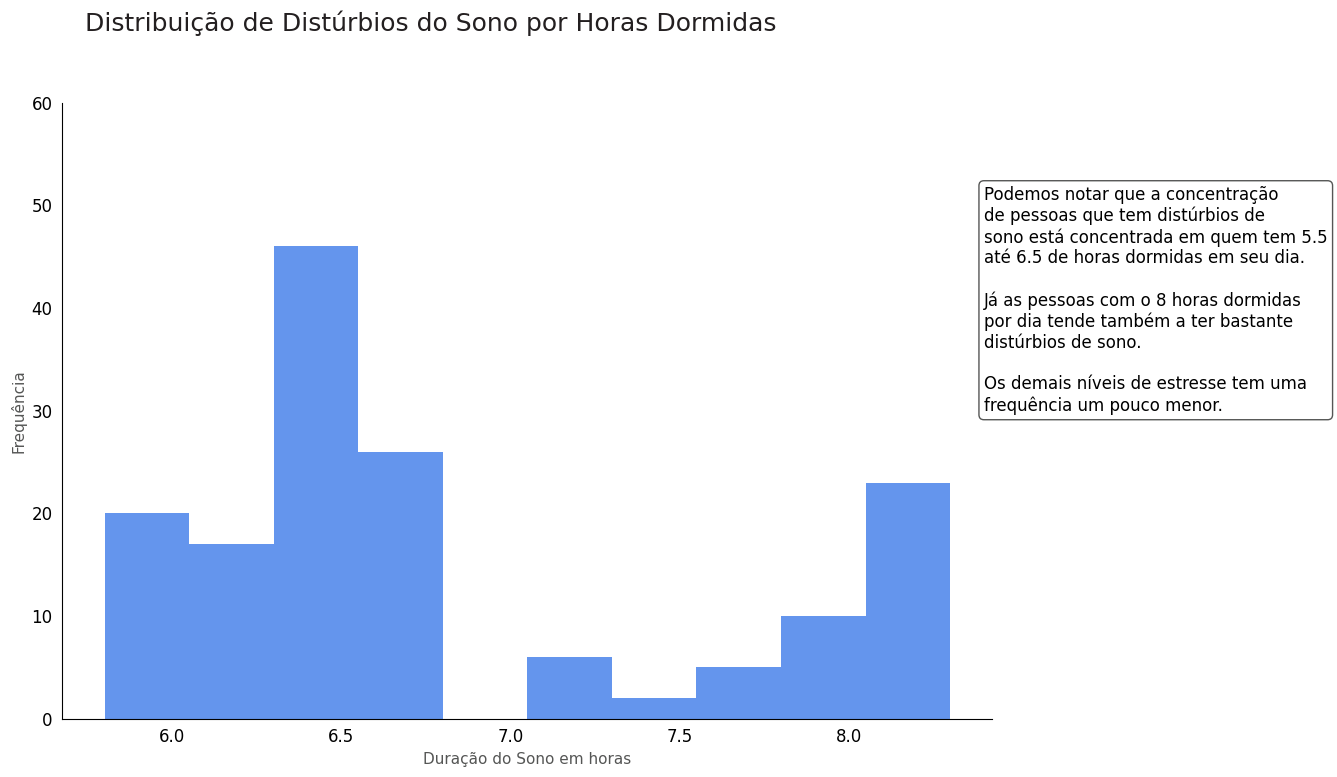

In [19]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Sleep Duration'].dropna()

fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(x,
        bins=10,
        color= AZUL3
        )



plt.suptitle('Distribuição de Distúrbios do Sono por Horas Dormidas',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.72
             )

ax.set_xlabel('Duração do Sono em horas',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )

ax.annotate('Podemos notar que a concentração\nde pessoas que tem distúrbios de' \
' \nsono está concentrada em quem tem 5.5\naté 6.5 de horas dormidas em seu dia.\n\n' \
'Já as pessoas com o 8 horas dormidas\npor dia tende também a ter bastante\ndistúrbios de sono.\n\n' \
'Os demais níveis de estresse tem uma\nfrequência um pouco menor.', xy=(8.4, 30), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)


ax.set_ylim((0,60))

ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## Insight do Gráfico

- Os dados indicam que pessoas com duração de sono inferior a 7 horas por noite apresentam maior incidência de distúrbios do sono.  
- Esse padrão reforça a importância do tempo de descanso como um fator crítico para a saúde.

- De acordo com recomendações amplamente aceitas na área da saúde, o tempo ideal de sono para adultos varia entre **7 e 9 horas por noite**. Dormir abaixo desse intervalo de forma recorrente pode comprometer a recuperação física e mental, aumentar o nível de estresse e elevar o risco de desenvolver problemas relacionados ao sono.


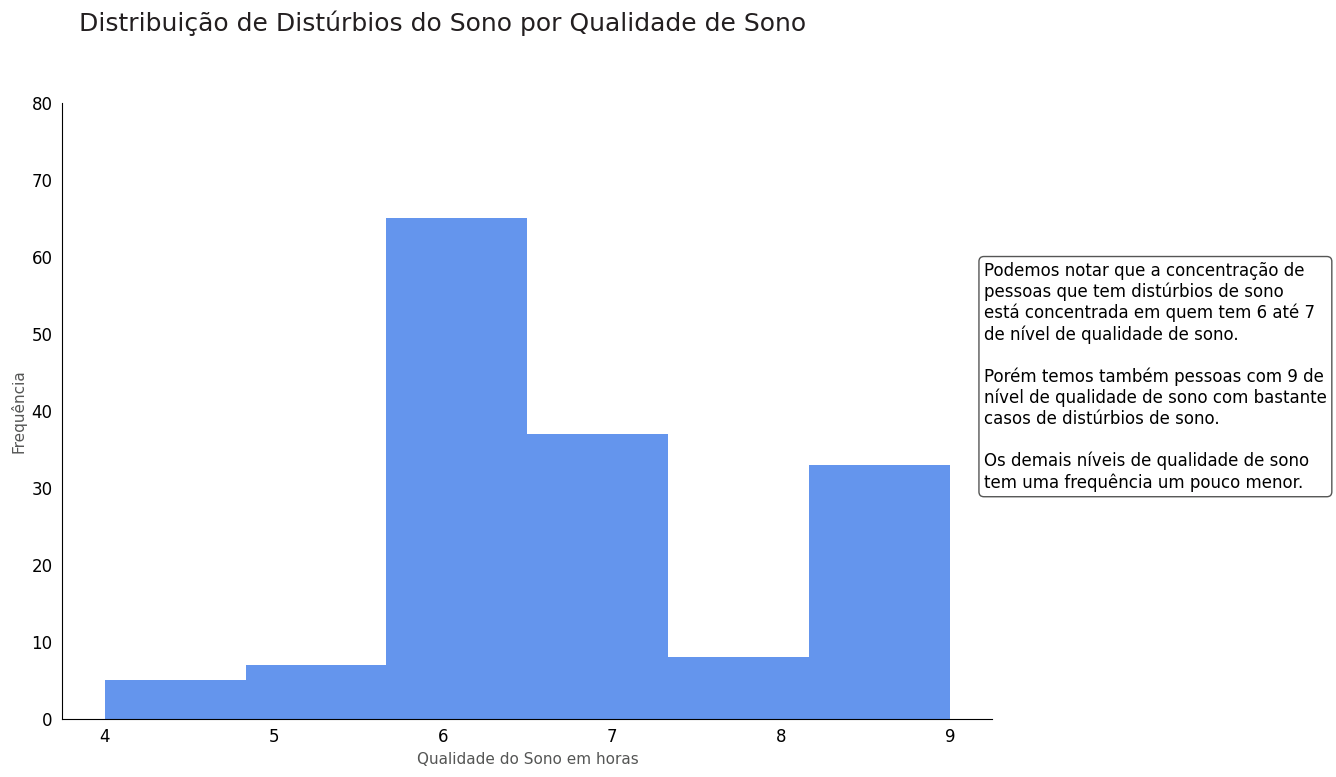

In [ ]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Quality of Sleep'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

plt.suptitle('Distribuição de Distúrbios do Sono por Qualidade de Sono',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.745
             )

ax.set_xlabel('Qualidade do Sono em horas',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,80))

ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=12)

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono\nestá concentrada em quem tem 6 até 7\nde nível de qualidade de sono.\n\n' \
'Porém temos também pessoas com 9 de\nnível de qualidade de sono com bastante\ncasos de distúrbios de sono.\n\n' \
'Os demais níveis de qualidade de sono\ntem uma frequência um pouco menor.', xy=(9.2, 30), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## Insight do Gráfico

- A análise mostra que a maior concentração de pessoas com distúrbios do sono está na faixa de **6 a 7** de qualidade do sono.  
- Esse intervalo representa um nível intermediário, sugerindo que mesmo quando o sono não é percebido como “ruim”, ele já pode estar associado a problemas mais estruturais no descanso.

- Observa-se também a presença de casos em níveis mais elevados, como **8 e 9**, indicando que a percepção subjetiva de qualidade nem sempre é suficiente para garantir um sono saudável.  
- Ainda assim, os níveis mais baixos concentram proporcionalmente mais ocorrências, reforçando que quanto menor a qualidade percebida, maior tende a ser a incidência de distúrbios.

- O resultado destaca a importância de monitorar não apenas extremos, mas também faixas consideradas “aceitáveis”, que podem mascarar problemas de sono em desenvolvimento.


In [ ]:
# Criando um filtro para plotar o gráfico

filtro_stress = (
    (df['Stress Level'] >= 4.0) &
    (df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']))
    )

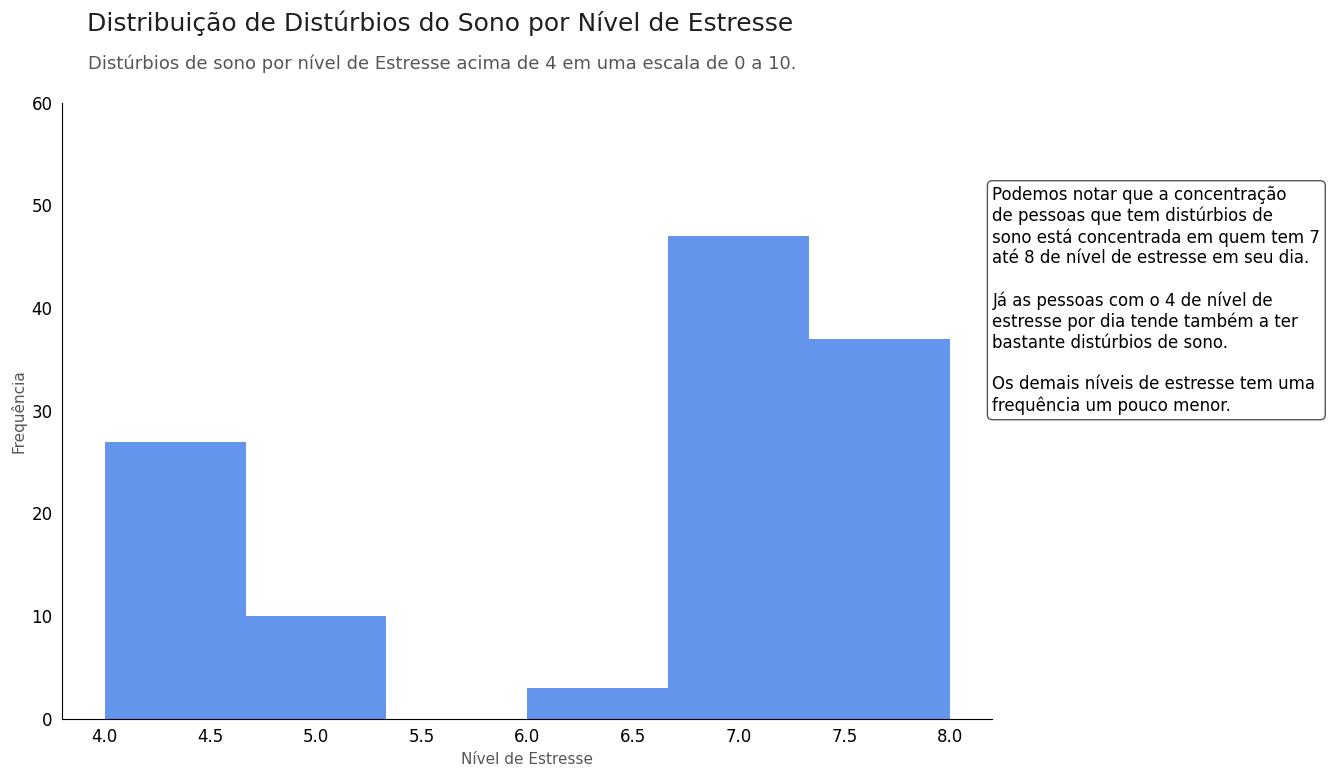

In [ ]:
x = df.loc[filtro_stress, 'Stress Level'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

# Definindo o Título

plt.suptitle('Distribuição de Distúrbios do Sono por Nível de Estresse',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.734
             )

# Definindo o Sub Título

ax.set_title('Distúrbios de sono por nível de Estresse acima de 4 em uma escala de 0 a 10.',
              fontsize=13,
              color= CINZA3,
              ha= 'right',
              va='center',
              x= 0.789,
              y= 1.05
              )

ax.set_xlabel('Nível de Estresse',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,60))

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração\nde pessoas que tem distúrbios de' \
' \nsono está concentrada em quem tem 7\naté 8 de nível de estresse em seu dia.\n\n' \
'Já as pessoas com o 4 de nível de\nestresse por dia tende também a ter\nbastante distúrbios de sono.\n\n' \
'Os demais níveis de estresse tem uma\nfrequência um pouco menor.', xy=(8.2, 30), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)


ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left= False,
               labelsize=12
               )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

# Insights do Gráfico

- Observa-se que o grupo que apresenta distúrbios do sono possui, em média, níveis mais elevados de estresse.  
- Esse padrão reforça a hipótese de que o estresse é um fator relevante associado a problemas de sono, podendo atuar tanto como causa quanto como consequência.


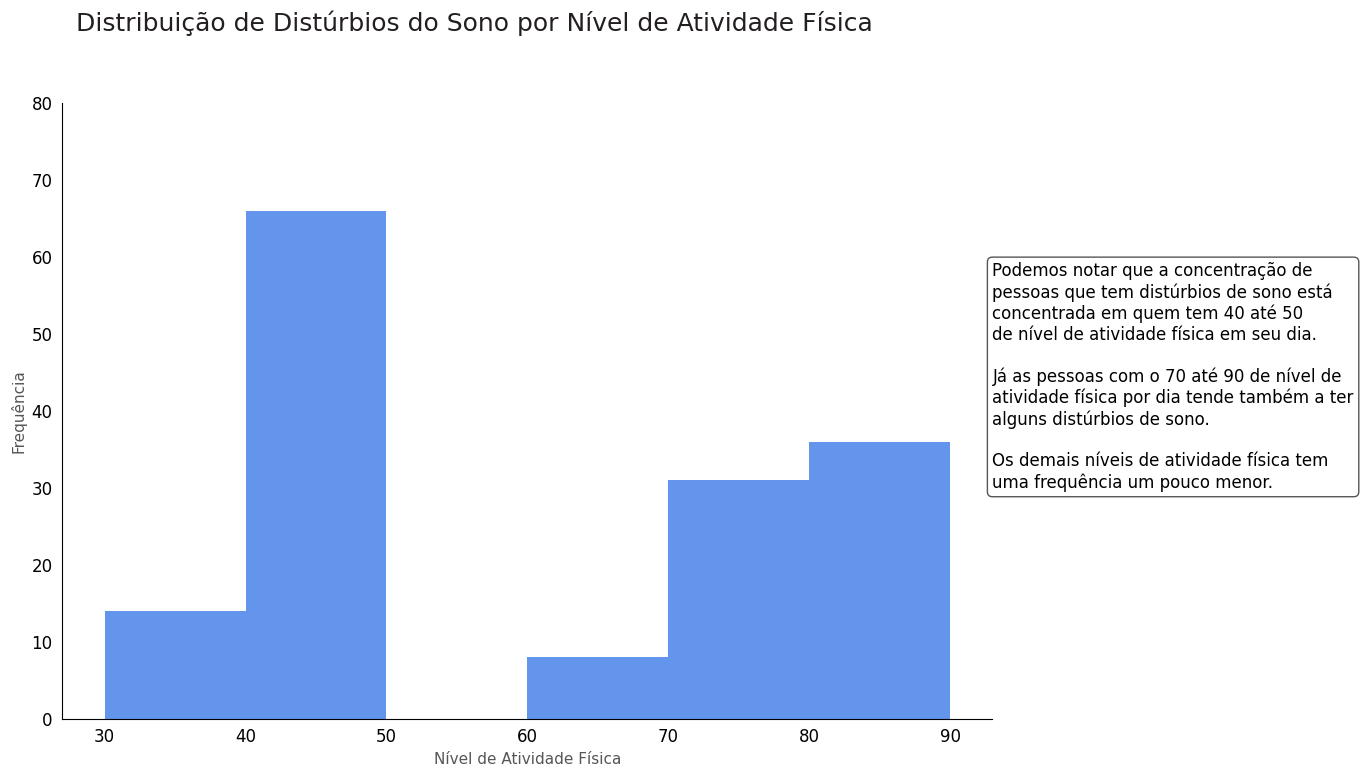

In [ ]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Physical Activity Level'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

plt.suptitle('Distribuição de Distúrbios do Sono por Nível de Atividade Física',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.80
             )

ax.set_xlabel('Nível de Atividade Física',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,80))

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono está\nconcentrada em quem tem 40 até 50\nde nível de atividade física em seu dia.\n\n' \
'Já as pessoas com o 70 até 90 de nível de\natividade física por dia tende também a ter\nalguns distúrbios de sono.\n\n' \
'Os demais níveis de atividade física tem\numa frequência um pouco menor.', xy=(93, 30), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)


ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left= False,
               labelsize=12
               )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## Insight do Gráfico

- A análise evidencia que pessoas que praticam menos atividades físicas apresentam maior propensão a desenvolver distúrbios do sono.  
- A baixa frequência de exercício está associada a menores níveis de gasto energético, aumento do estresse e pior regulação do ritmo biológico, fatores que impactam diretamente a qualidade do sono.

- Esse resultado reforça a importância da atividade física regular como um dos pilares para a manutenção de um sono mais saudável e reparador.


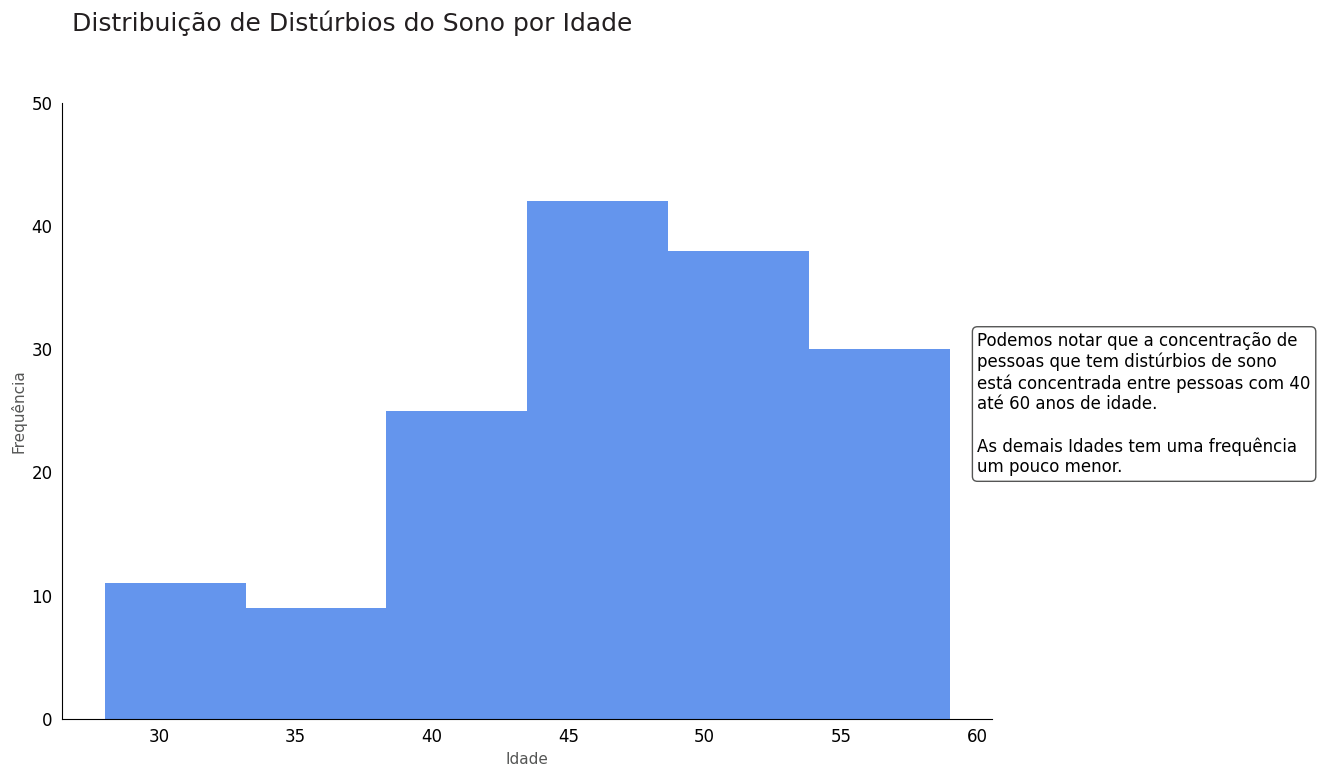

In [ ]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Age'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

plt.suptitle('Distribuição de Distúrbios do Sono por Idade',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.6
             )

ax.set_xlabel('Idade',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,50))

ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=12)

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono\nestá concentrada entre pessoas com 40\naté 60 anos de idade.\n\n' \
'As demais Idades tem uma frequência\num pouco menor.', xy=(60, 20), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## Insight do Gráfico

- Os dados indicam que indivíduos com idade entre **40 e 60 anos** apresentam maior incidência de distúrbios do sono.  
- Essa faixa etária costuma concentrar fatores como aumento de responsabilidades profissionais, maior carga de estresse, alterações hormonais e o surgimento de condições de saúde que podem impactar diretamente a qualidade do descanso.

- O resultado sugere que o avanço da idade, especialmente a partir dos 40 anos, está associado a um risco mais elevado de problemas relacionados ao sono.

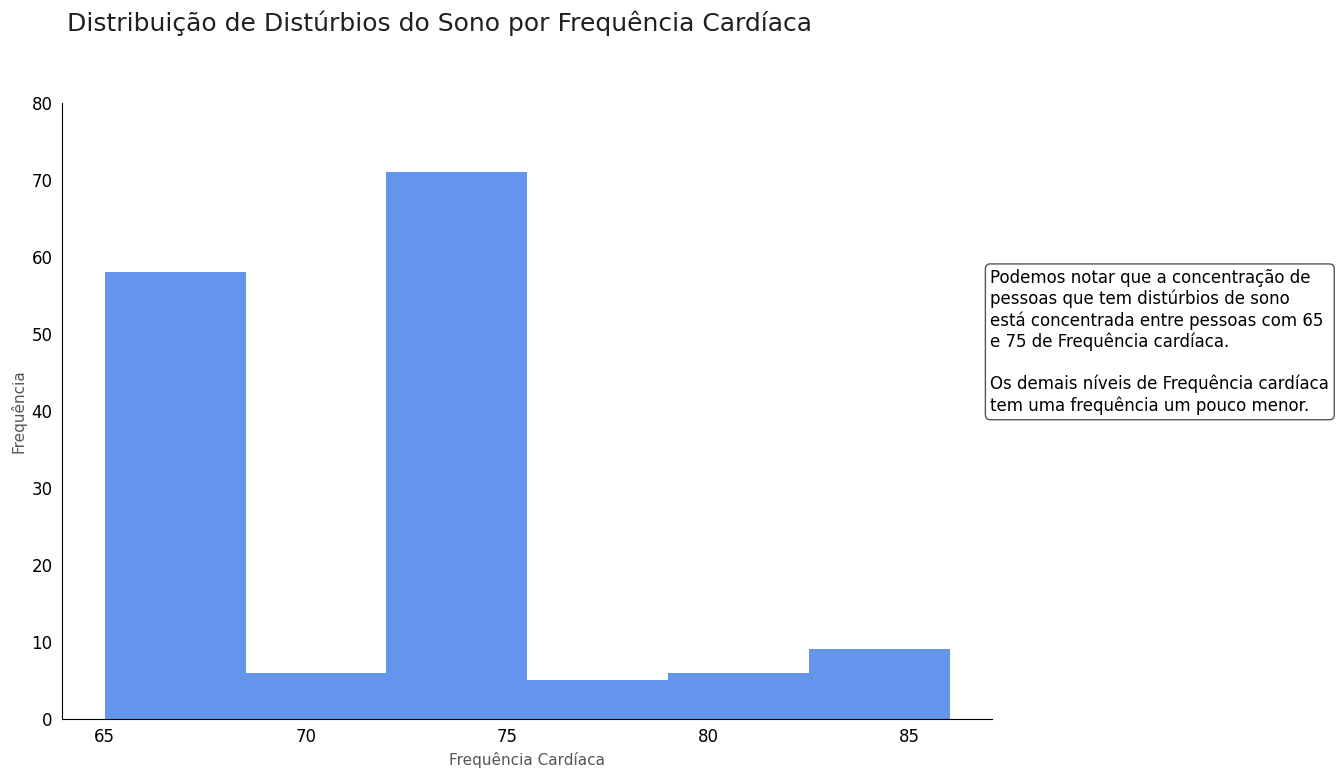

In [ ]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Heart Rate'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

plt.suptitle('Distribuição de Distúrbios do Sono por Frequência Cardíaca',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.75
             )

ax.set_xlabel('Frequência Cardíaca',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,80))

ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=12)

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono\nestá concentrada entre pessoas com 65\ne 75 de Frequência cardíaca.\n\n' \
'Os demais níveis de Frequência cardíaca\ntem uma frequência um pouco menor.', xy=(87, 40), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## Insight do Gráfico

- A distribuição evidencia que a maior concentração de pessoas com distúrbios do sono está na faixa de **65 a 75 batimentos por minuto (bpm)** de frequência cardíaca em repouso.  
- Nas faixas superiores, acima de 75 bpm, observa-se uma redução na quantidade de casos, embora ainda existam ocorrências relevantes.

- Esse padrão sugere que indivíduos com frequência cardíaca em repouso levemente elevada — possivelmente associada a estresse, menor condicionamento físico ou alterações metabólicas — tendem a apresentar maior propensão a distúrbios do sono.

- A relação reforça a conexão entre o funcionamento do sistema cardiovascular e a qualidade do descanso, indicando que parâmetros fisiológicos podem atuar como sinais indiretos de risco para problemas de sono.


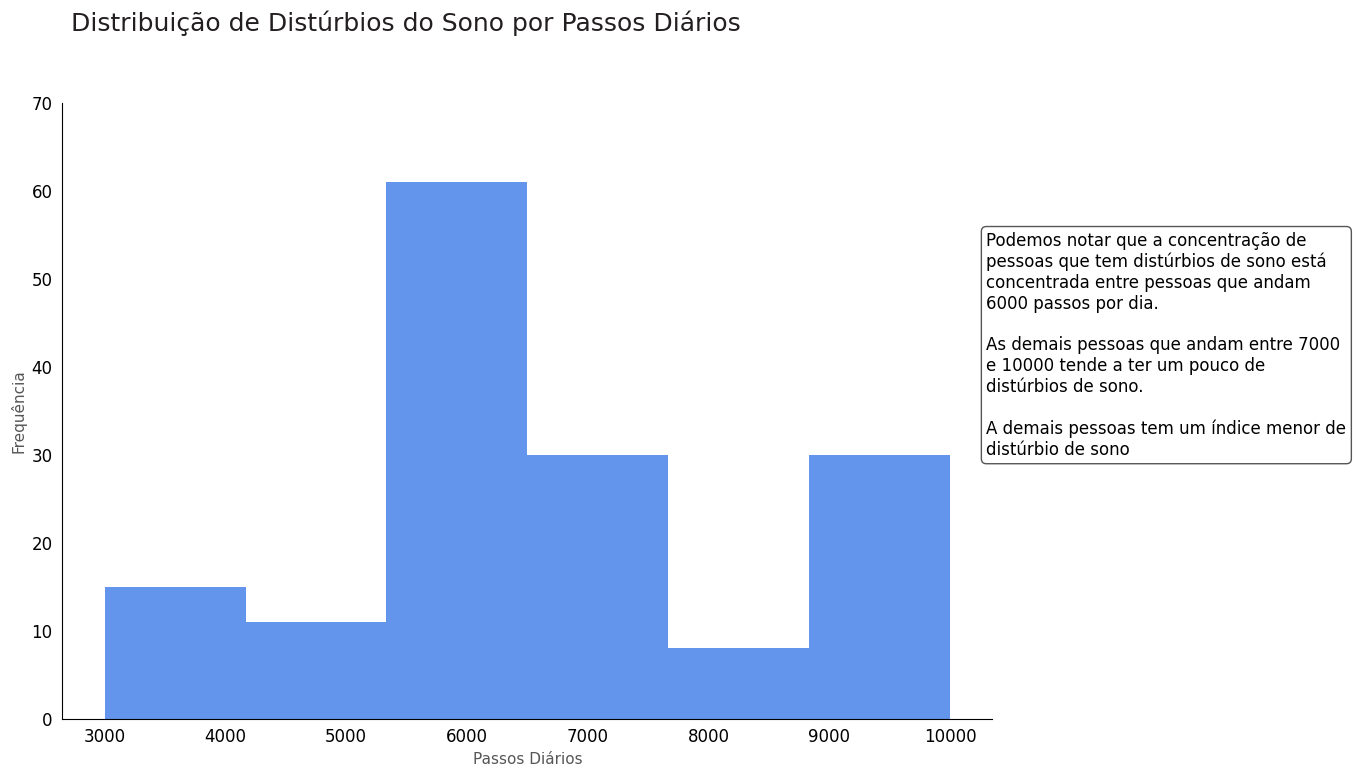

In [ ]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Daily Steps'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

plt.suptitle('Distribuição de Distúrbios do Sono por Passos Diários',
             fontsize=18,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.69
             )

ax.set_xlabel('Passos Diários',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,70))

ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=12)

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono está\nconcentrada entre pessoas que andam\n6000 passos por dia.\n\n' \
'As demais pessoas que andam entre 7000\ne 10000 tende a ter um pouco de\ndistúrbios de sono.\n\n' \
'A demais pessoas tem um índice menor de\ndistúrbio de sono', xy=(10300, 30), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## Insight do Gráfico

- A distribuição dos dados indica que a maior concentração de pessoas com distúrbios do sono está entre aquelas que realizam em torno de **6.000 passos por dia**.  
- À medida que o número de passos aumenta para a faixa entre **7.000 e 10.000 passos diários**, observa-se uma redução gradual na incidência de distúrbios do sono.

- Indivíduos que mantêm níveis mais elevados de movimentação diária tendem a apresentar menor frequência de problemas relacionados ao sono, sugerindo que a atividade física cotidiana exerce papel relevante na regulação do descanso.

- Esse padrão reforça a ideia de que um estilo de vida mais ativo — mesmo em atividades simples como caminhar — está associado a uma melhor qualidade do sono e menor propensão a distúrbios.


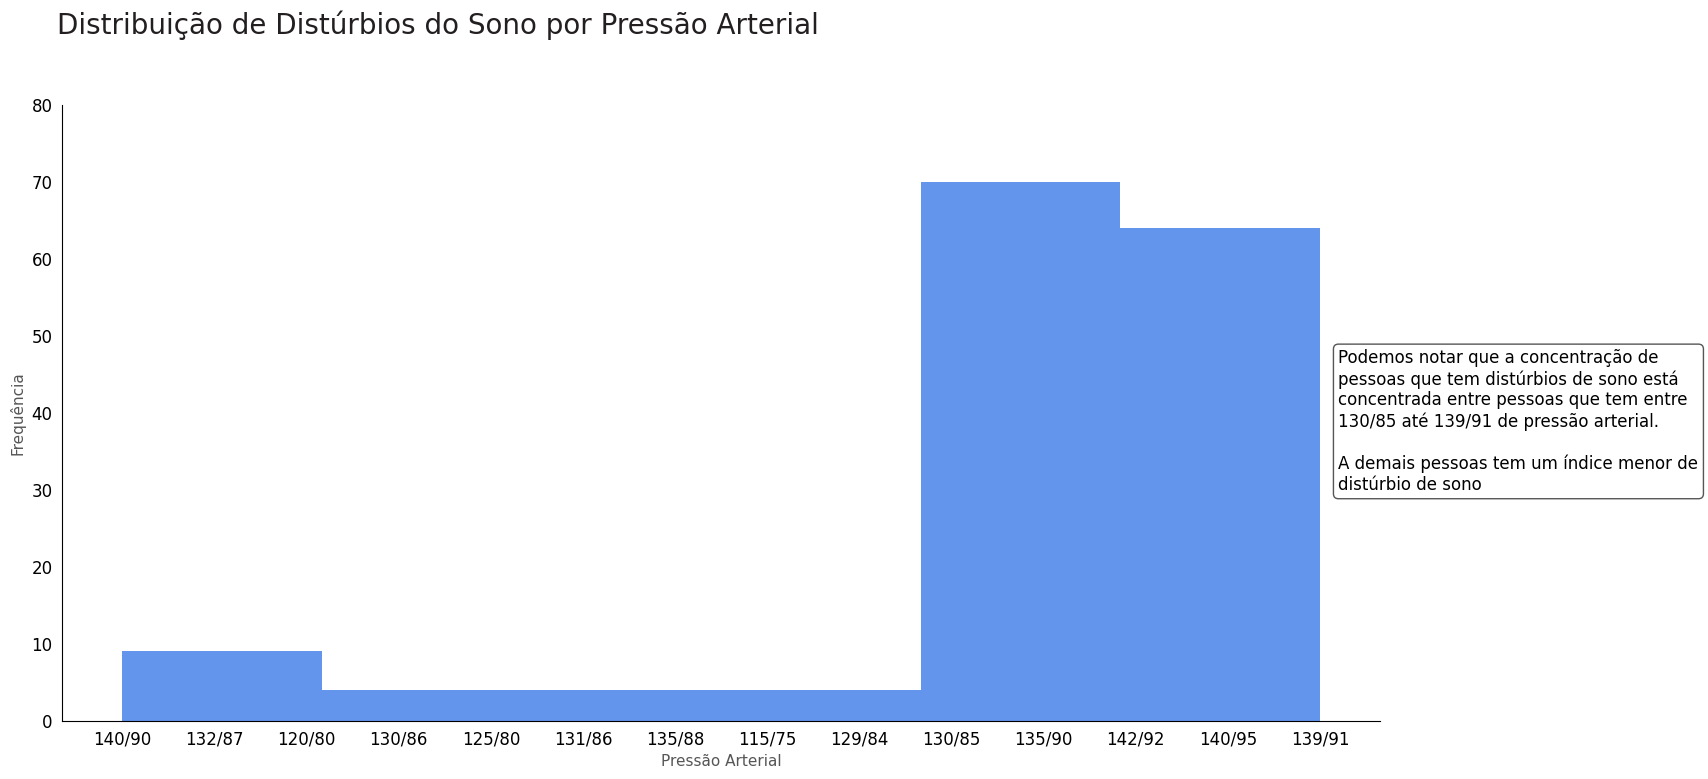

In [ ]:
x = df.loc[df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']), 'Blood Pressure'].dropna()

# Criando o gráfico

fig, ax = plt.subplots(figsize=(17, 8))

ax.hist(x,
        bins=6,
        color= AZUL3
        )

plt.suptitle('Distribuição de Distúrbios do Sono por Pressão Arterial',
             fontsize=20,
             color= CINZA1,
             ha= 'right',
             va='center',
             x= 0.57
             )

ax.set_xlabel('Pressão Arterial',
              fontsize= 11,
              color = CINZA3
              )

ax.set_ylabel('Frequência',
              fontsize= 11,
              color = CINZA3
              )


ax.set_ylim((0,80))

ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=12)

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono está\nconcentrada entre pessoas que tem entre\n130/85 até 139/91 de pressão arterial.\n\n' \
'A demais pessoas tem um índice menor de\ndistúrbio de sono', xy=(13.2, 30), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

# Insight do Gráfico

- Indivíduos com distúrbios do sono apresentam, em média, valores mais elevados de pressão sistólica e diastólica.  
- Isso sugere uma relação entre saúde cardiovascular e qualidade do sono, reforçando achados já conhecidos na literatura médica.


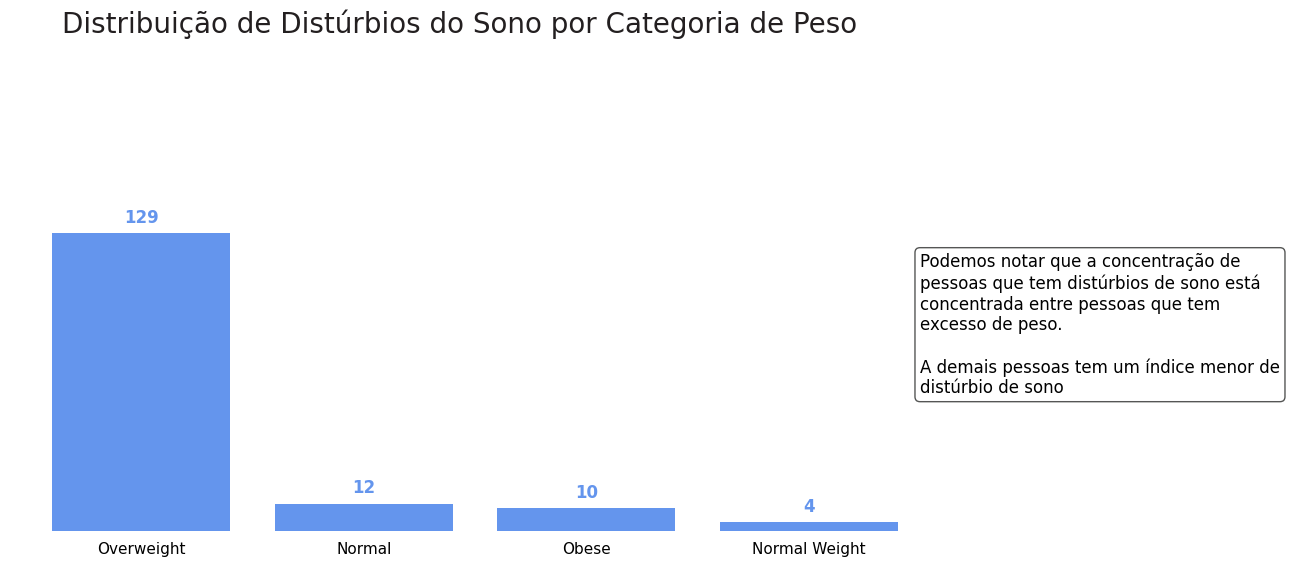

In [ ]:
filtro = df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])
counts = df.loc[filtro, 'BMI Category'].value_counts(dropna=True)

# Criando o gráfico

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(counts.index,
       counts.values,
       color=AZUL3)

# Colocando os rótulos em cima de cada barra

for i, v in enumerate(counts.values):
    ax.annotate(str(v), xy=(i, v), xytext=(0, 5),
                textcoords="offset points",
                ha="center", va="bottom",
                color=AZUL3,
                fontsize=12,
                fontweight='bold')
    
plt.suptitle('Distribuição de Distúrbios do Sono por Categoria de Peso',
             fontsize=20,
             color= CINZA1,
             )

ax.set_ylim((0,200)) 
ax.tick_params(axis='both',
               which='both',
               bottom= False,
               left=False,
               labelsize=11
               )

# Gerando um comentário no gráfico

ax.annotate('Podemos notar que a concentração de\npessoas que tem distúrbios de' \
' sono está\nconcentrada entre pessoas que tem\nexcesso de peso.\n\n' \
'A demais pessoas tem um índice menor de\ndistúrbio de sono', xy=(3.5, 60), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points', fontsize= 12)

ax.set_frame_on(False) 
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Insights do Gráfico

- A distribuição por categoria de IMC revela uma concentração significativamente maior de distúrbios entre pessoas com sobrepeso.  
- Em especial, a categoria "Overweight" apresenta incidência praticamente total de distúrbios do sono, indicando forte associação entre excesso de peso e problemas de sono.

## Conclusão

A análise evidencia que os distúrbios do sono não ocorrem de forma aleatória. Eles estão fortemente associados a um conjunto consistente de fatores relacionados à saúde e ao estilo de vida.

De maneira geral, o perfil com maior propensão a apresentar distúrbios do sono é composto por pessoas que:

- Possuem níveis mais elevados de estresse  
- Apresentam sobrepeso  
- Têm pressão arterial mais alta  
- Realizam menos atividade física  
- Atuam em profissões com maior carga emocional ou operacional  

Esses achados indicam que o sono está diretamente conectado ao equilíbrio físico e emocional do indivíduo.  
Mais do que um problema isolado, os distúrbios do sono surgem como parte de um contexto mais amplo de saúde, refletindo hábitos, rotina e condições fisiológicas.

Como próximos passos, este projeto poderia evoluir para:

- Construção de um modelo preditivo de risco  
- Criação de um *score* de propensão a distúrbios do sono  
- Exploração de técnicas de Machine Learning para classificação  

Entretanto, este trabalho tem como propósito ser um **projeto simples de Análise de Dados**, cujo foco é demonstrar que dados bem tratados, organizados e interpretados são capazes de gerar insights relevantes e apoiar a tomada de decisão.

O estudo reforça que a análise adequada de dados pode contribuir significativamente para ações de prevenção, promoção do bem-estar e definição de estratégias em contextos relacionados à saúde.
